# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\HP\Downloads\archive (2)\PS_20174392719_1491204439457_log.csv")

# take sample(n=100000)
data_fraud = data.sample(n=100000)

In [2]:
data_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2328106,188,CASH_OUT,229958.46,C234075259,6571.00,0.00,C627261053,625231.13,855189.59,0,0
2095819,182,CASH_IN,156701.01,C491563900,12196609.54,12353310.55,C1481025099,775777.95,619076.94,0,0
4138646,303,CASH_OUT,256788.30,C750515212,0.00,0.00,C221297430,1252325.79,1509114.09,0,0
345757,16,CASH_IN,74929.70,C399287993,4036776.07,4111705.78,C1297967206,3271432.84,3196503.14,0,0
22592,8,PAYMENT,3973.92,C1387033355,12768.00,8794.08,M352402565,0.00,0.00,0,0


In [3]:
data_fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [4]:
data_fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.433560,1.768992e+05,8.363524e+05,8.585345e+05,1.113739e+06,1.235500e+06,0.001220,0.0
std,141.988988,6.008799e+05,2.877970e+06,2.914387e+06,3.444268e+06,3.710799e+06,0.034907,0.0
min,1.000000,3.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.340776e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,238.000000,7.494851e+04,1.447300e+04,0.000000e+00,1.347259e+05,2.162173e+05,0.000000,0.0
75%,334.000000,2.086283e+05,1.078412e+05,1.468278e+05,9.499122e+05,1.118801e+06,0.000000,0.0
max,739.000000,6.750076e+07,3.496252e+07,3.494676e+07,3.553814e+08,3.551855e+08,1.000000,0.0


In [ ]:
# Headers explicadas (in the Kaggle Dataset):

step: unidade de tempo (1 step = 1 hora)
type: tipo de pagamento (CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER)
amount: quantidade da transação na moeda local
nameOrig: cliente q começou a transação 
oldbalanceOrg; balanço inicial antes da transação 
newbalanceOrig: novo balanço dps da transação 
nameDest: cliente recipiente da transação
oldbalanceDest: balanço recipiente inicial antes da transação, sem informação de clientes q começam com M (merchants)
newbalanceDest: novo balanço recipiente dps da transação, sem informação de clientes q começam com M (merchants)
isFraud: transações feitas por agentes fraudulentos (tentam tirar controlo das contas dos clientes e esvaziar-lhes os fundos, ao transferir para outra conta e levantar dinheiro fora do sistema)
isFlaggedFraud: modelo de negócio tenta controlar massivamente as contas duma conta para a outra e "alerta" tentativas ilegais (+ 200000)

### What is the distribution of the outcome? 

In [8]:
data_fraud["isFraud"].value_counts()

# o meu pc não está com vontade de mostrar gráficos de distribuição hj (mas tbm há tão poucas fraudes q nem dá para visualizar bem)
# mas vemos claramente q há poucas Fraudes

0    99878
1      122
Name: isFraud, dtype: int64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [9]:
# 24 steps = 1 dia
def time_hours(hour):
    return round(hour/24,2)
    

data_fraud["day"] = data_fraud["step"].apply(time_hours)
data_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day
2328106,188,CASH_OUT,229958.46,C234075259,6571.00,0.00,C627261053,625231.13,855189.59,0,0,7.83
2095819,182,CASH_IN,156701.01,C491563900,12196609.54,12353310.55,C1481025099,775777.95,619076.94,0,0,7.58
4138646,303,CASH_OUT,256788.30,C750515212,0.00,0.00,C221297430,1252325.79,1509114.09,0,0,12.62
345757,16,CASH_IN,74929.70,C399287993,4036776.07,4111705.78,C1297967206,3271432.84,3196503.14,0,0,0.67
22592,8,PAYMENT,3973.92,C1387033355,12768.00,8794.08,M352402565,0.00,0.00,0,0,0.33


In [10]:
data_fraud.drop(columns=["step"], inplace=True)


In [13]:
# parece-me fazer sentido One-Hot Encoding no Type column
data_fraud = pd.get_dummies(data_fraud, columns=["type"])
data_fraud.head()

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2328106,229958.46,C234075259,6571.00,0.00,C627261053,625231.13,855189.59,0,0,7.83,0,1,0,0,0
2095819,156701.01,C491563900,12196609.54,12353310.55,C1481025099,775777.95,619076.94,0,0,7.58,1,0,0,0,0
4138646,256788.30,C750515212,0.00,0.00,C221297430,1252325.79,1509114.09,0,0,12.62,0,1,0,0,0
345757,74929.70,C399287993,4036776.07,4111705.78,C1297967206,3271432.84,3196503.14,0,0,0.67,1,0,0,0,0
22592,3973.92,C1387033355,12768.00,8794.08,M352402565,0.00,0.00,0,0,0.33,0,0,0,1,0


In [15]:
data_fraud["isFlaggedFraud"].value_counts()  # sempre 0, por isso é drop

data_fraud.drop(columns=["isFlaggedFraud"], inplace=True)

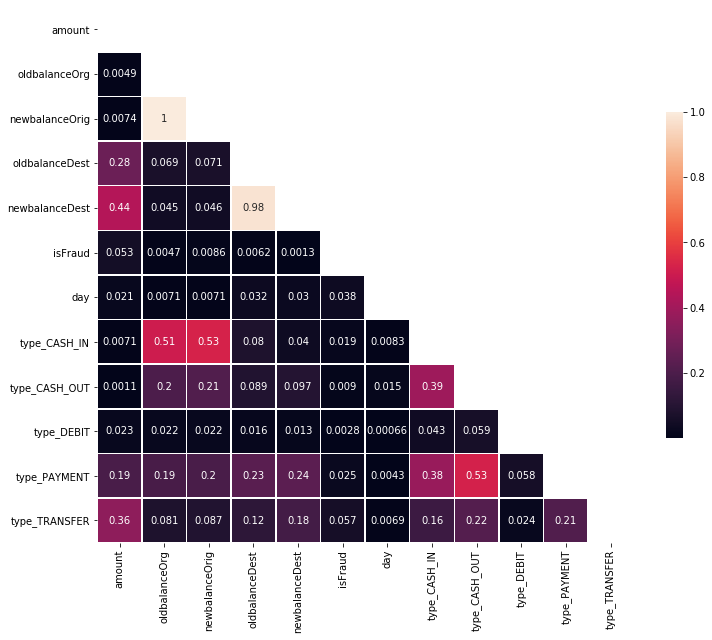

In [17]:
# correlation matrix

corr = np.abs(data_fraud.corr())

# mask (for triangle representation)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# costruir a figura matplotlib
f, ax = plt.subplots(figsize=(12,12))
# gerar diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# desenhar heatmap com a mask e corrigir aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=corr)

plt.show() 


# nota: talvez normalizar fosse boa opção (mas não quero mexer nos valores das transações)

In [ ]:
# ideas:
#   - normalize amounts of money (amount, oldbalancedOrg, newbalanceOrig, oldbalanceDest, newbalanceDest)

# há mais coisas q sei q podia fazer para limpar melhor a data...mas não há tempo lol há q seguir para o Final Project!

In [22]:
data_fraud.dtypes

amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
day               float64
type_CASH_IN        uint8
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

### Run a logisitc regression classifier and evaluate its accuracy.

In [26]:
from sklearn.model_selection import train_test_split

x = data_fraud[["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]]
y = data_fraud["isFraud"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=1) 



from sklearn.linear_model import LogisticRegression

# initiate model
model = LogisticRegression()

# training model 
model = model.fit(x_train, y_train)

print("Test accuracy:", model.score(x_test,y_test))
print("Train accuracy:", model.score(x_train, y_train))



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


y_pred = model.predict(x_test)

print("Classification report:", classification_report(y_pred,y_test))   # accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(model.predict(x_test),y_test))
print("Test data accuracy:", model.score(x_test,y_test))  # the same as accuracy score
print("Train data accuracy:", model.score(x_train, y_train))

Test accuracy: 0.93995
Train accuracy: 0.941375
Classification report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97     18791
           1       0.64      0.01      0.03      1209

    accuracy                           0.94     20000
   macro avg       0.79      0.51      0.50     20000
weighted avg       0.92      0.94      0.91     20000

Accuracy Score: 0.93995
Confusion Matrix: [[18781    10]
 [ 1191    18]]
Test data accuracy: 0.93995
Train data accuracy: 0.941375


### Now pick a model of your choice and evaluate its accuracy.

In [ ]:
# Classifiers & Regressors

### Which model worked better and how do you know?

In [ ]:
# Your response here

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.